### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from PIL import Image

## Question 1

### Functions

In [13]:
def dft1(x):
    n = x.shape[-1]
    X = np.zeros(x.shape, dtype=np.complex128)
    for a in range(n):
        for b in range(n):
            X[a] += x[b] * np.exp(-2j * np.pi * a * (b / n))
    return X

In [14]:
def dft2(x):
    # y = np.zeros(x.shape, dtype=np.complex128)

    # # DFT on rows
    # for i in range(x.shape[0]):
    #     y[i, :] = dft1(x[i, :])
    
    # # DFT on columns
    # for j in range(x.shape[1]):
    #     y[:, j] = dft1(y[:, j])

    x_shape = np.array(x.shape)

    # Pad rows & columns with zeros to make them powers of 2
    pad_size = np.power(2, np.ceil(np.log2(x_shape)).astype(int)) - x_shape
    x = np.pad(x, ((0, pad_size[0]), (0, pad_size[1])), 'constant')

    y = dft1(x)
    y = dft1(y.T).T

    # y = y[:x_shape[0], :x_shape[1]]

    return y

In [15]:
def fft1(a):
    n = a.shape[-1]
    if n == 1:
        y = a
        return y
    if len(a.shape) == 1:
        axis = 0
    else:
        axis = 1
    a_even = a[0 : n : 2]
    a_odd = a[1 : n : 2]
    if axis:
        a_even = a[:, 0 : n : 2]
        a_odd = a[:, 1 : n : 2]
    y_even = fft1(a_even)
    y_odd = fft1(a_odd)
    E = []
    for k in range(int(n / 2)):
        E.append(np.exp(-2j * np.pi * (k / n)))
    E = np.array(E)
    y = []
    y = y_even + E * y_odd
    y = np.append(y, y_even - E * y_odd, axis = axis)
    return y

In [16]:
def fft2(x):
    # x_shape = np.array(x.shape)

    # # Pad rows & columns with zeros to make them powers of 2
    # pad_size = np.power(2, np.ceil(np.log2(x_shape)).astype(int)) - x_shape
    # x = np.pad(x, ((0, pad_size[0]), (0, pad_size[1])), 'constant')

    # y = np.zeros(x.shape, dtype=np.complex128)

    # # DFT on rows
    # for i in range(x.shape[0]):
    #     y[i, :] = fft1(x[i, :])
    
    # # DFT on columns
    # for j in range(x.shape[1]):
    #     y[:, j] = fft1(y[:, j])
    
    # y = y[0 : x_shape[0], 0 : x_shape[1]]

    # return y

    x_shape = np.array(x.shape)

    # Pad rows & columns with zeros to make them powers of 2
    pad_size = np.power(2, np.ceil(np.log2(x_shape)).astype(int)) - x_shape
    x = np.pad(x, ((0, pad_size[0]), (0, pad_size[1])), 'constant')

    y = fft1(x)
    y = fft1(y.T).T

    # y = y[:x_shape[0], :x_shape[1]]

    return y

In [17]:
def ifft2(ft, img_size):
    ft = ft.conj()
    ft = fft2(ft)
    ft = ft.conj()
    ft = ft / ft.size

    ft = ft[:img_size[0], :img_size[1]]

    return ft

In [29]:
def display_ft(img, ft):
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(np.log(10 + np.abs(np.fft.fftshift(ft))), cmap='gray')
    plt.title('Fourier Transform')
    plt.show()

In [19]:
def display_ift(ft, ift):
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,2)
    plt.imshow(np.abs(ift), cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,2,1)
    plt.imshow(np.log(10 + np.abs(np.fft.fftshift(ft))), cmap='gray')
    plt.title('Fourier Transform')
    plt.axis('off')
    plt.show()

### Main

In [567]:
a = np.array([1, 2, 3, 4])

print(dft1(a))
print(fft1(a))
print(np.fft.fft(a))

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [568]:
b = np.array([[1,2], [3,4]])

print(dft2(b))
print(fft2(b))
print(np.fft.fft2(b))

[[10.+0.00000000e+00j -2.-7.34788079e-16j]
 [-4.-8.57252759e-16j  0.+3.67394040e-16j]]
[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]
[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


 50%|█████     | 2/4 [00:00<00:00, 16.19it/s]

100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


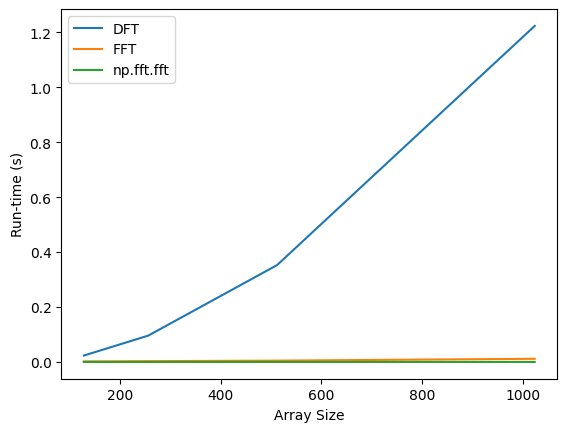

In [569]:
array_sizes = [128, 256, 512, 1024]
dft_times = []
fft_times = []
np_fft_times = []

for size in tqdm(array_sizes):
    array = np.random.rand(size)
    
    start_time = time.time()
    dft1(array)
    end_time = time.time()
    dft_times.append(end_time - start_time)
    
    start_time = time.time()
    fft1(array)
    end_time = time.time()
    fft_times.append(end_time - start_time)

    start_time = time.time()
    np.fft.fft(array)
    end_time = time.time()
    np_fft_times.append(end_time - start_time)

plt.plot(array_sizes, dft_times, label='DFT')
plt.plot(array_sizes, fft_times, label='FFT')
plt.plot(array_sizes, np_fft_times, label='np.fft.fft')
plt.xlabel('Array Size')
plt.ylabel('Run-time (s)')
plt.legend()
plt.show()

> Observations:

As we can see that the time for the dft1 function increases with the increase in the size of the array, whereas the time for the fft1 function remains almost the same. This is because the time complexity of the dft1 function is O(n^2) whereas the time complexity of the fft1 function is O(nlogn), which means that the time for the dft1 function increases quadratically with the increase in the size of the array, whereas the time for the fft1 function increases almost linearly with the increase in the size of the array, that too very slowly.

100%|██████████| 5/5 [00:27<00:00,  5.45s/it]


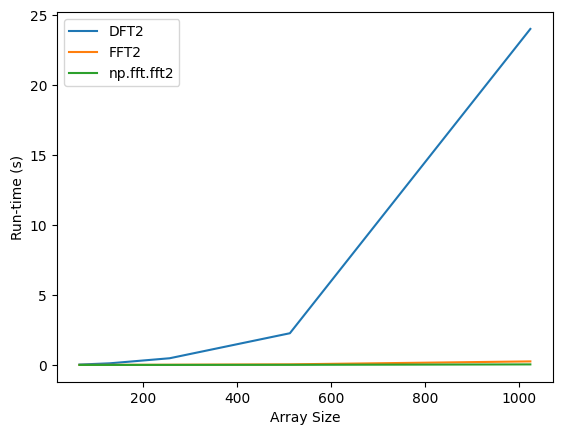

In [570]:
# array_sizes = [128, 256, 512, 1024]
array_sizes = [64, 128, 256, 512, 1024]
dft_times = []
fft_times = []
np_fft_times = []

for size in tqdm(array_sizes):
    array = np.random.rand(size, size)
    
    start_time = time.time()
    dft2(array)
    end_time = time.time()
    dft_times.append(end_time - start_time)
    
    start_time = time.time()
    fft2(array)
    end_time = time.time()
    fft_times.append(end_time - start_time)

    start_time = time.time()
    np.fft.fft2(array)
    end_time = time.time()
    np_fft_times.append(end_time - start_time)

plt.plot(array_sizes, dft_times, label='DFT2')
plt.plot(array_sizes, fft_times, label='FFT2')
plt.plot(array_sizes, np_fft_times, label='np.fft.fft2')
plt.xlabel('Array Size')
plt.ylabel('Run-time (s)')
plt.legend()
plt.show()

In [571]:
n=256

img = np.zeros((n,n))

x = np.linspace(-n//2, n//2, n)
y = np.linspace(-n//2, n//2, n)

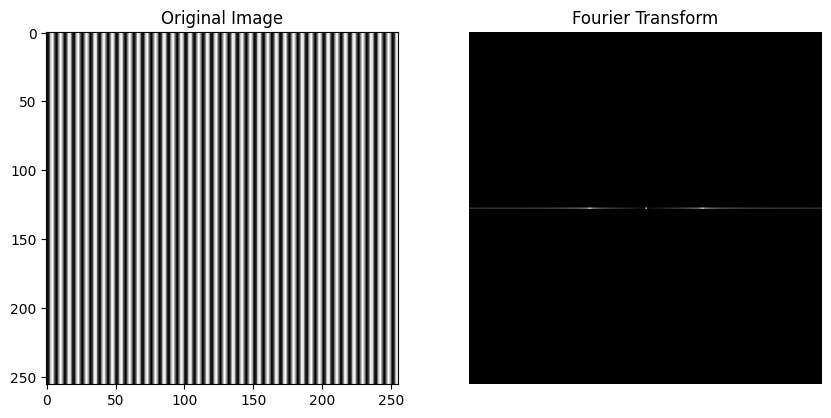

In [572]:
intensity = lambda x: 0.5 * (1 + np.sin(x))
img[:] = intensity(x)

display_ft(img, dft2(img))

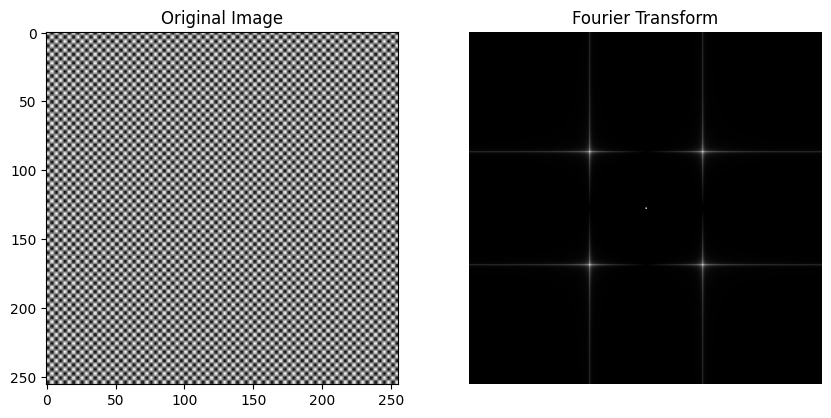

In [573]:
intensity = lambda x,y : 0.5 * (1 + np.sin(x) * np.sin(y))

for i in range(n):
    for j in range(n):
        img[i,j] = intensity(x[i], y[j])

display_ft(img, dft2(img))

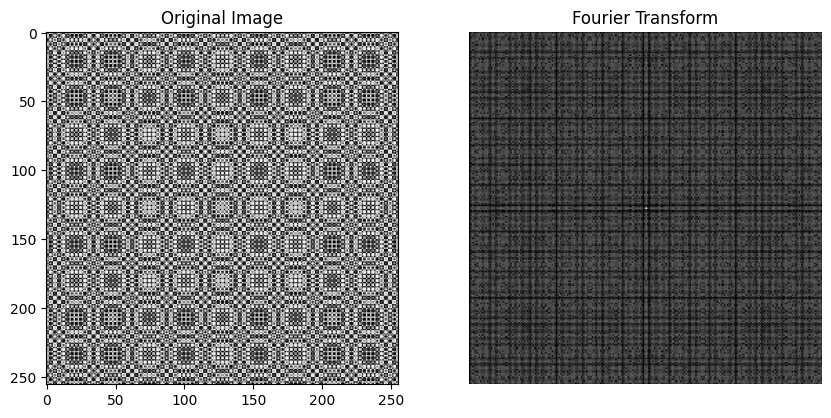

In [574]:
intensity = lambda x,y : 0.5 * (1 + np.sin(x**2 + y**2))

for i in range(n):
    for j in range(n):
        img[i,j] = intensity(x[i], y[j])

display_ft(img, dft2(img))

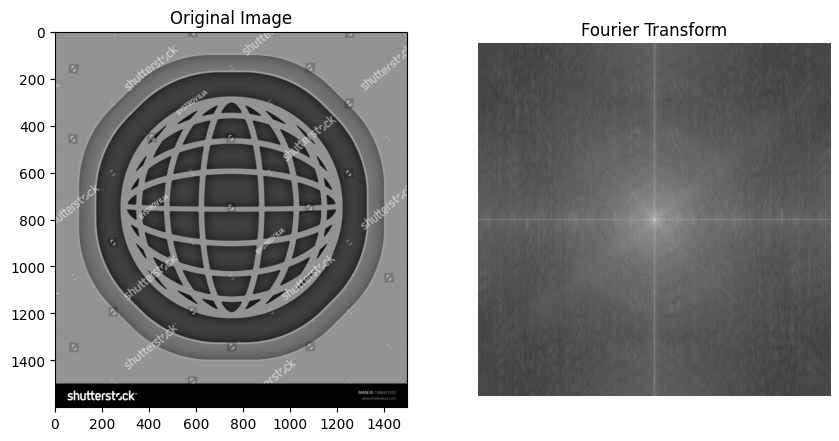

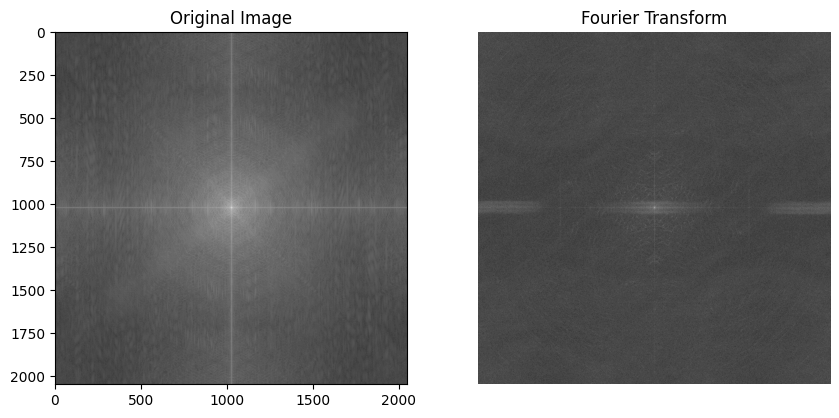

In [575]:
img1 = Image.open('1024_1024.jpg').convert('L')
img1 = np.array(img1)

result = fft2(img1)
display_ft(img1, result)
result1  =np.log(10 + np.abs(np.fft.fftshift(result)))
display_ft(result1, fft2(result1))

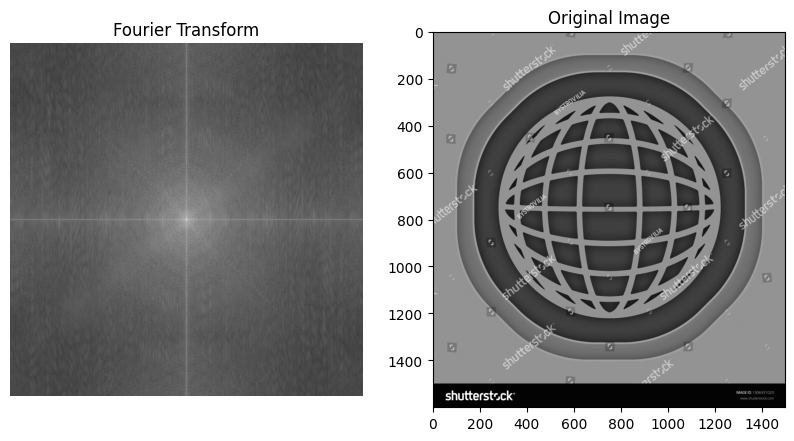

In [576]:
display_ift(result, ifft2(result, img1.shape))

## Question 2

### Function/s

In [24]:
def ideal_lpf(image, cut_off_frequency):
    fft = fft2(image)
    fft = np.fft.fftshift(fft)

    mask = np.zeros(fft.shape)
    x, y = np.meshgrid(np.arange(-fft.shape[1]//2, fft.shape[1]//2), np.arange(-fft.shape[0]//2, fft.shape[0]//2))
    dist = np.sqrt(x**2 + y**2)
    mask[dist <= cut_off_frequency] = 1

    filtered_fft = fft * mask
    filtered_image = np.abs(ifft2(filtered_fft, image.shape))
    
    return filtered_image, np.fft.ifftshift(filtered_fft)

In [25]:
def gaussian_lpf(image, cut_off_frequency):
    fft = fft2(image)
    fft = np.fft.fftshift(fft)

    mask = np.zeros(fft.shape)
    x, y = np.meshgrid(np.arange(-fft.shape[1]//2, fft.shape[1]//2), np.arange(-fft.shape[0]//2, fft.shape[0]//2))
    dist = np.sqrt(x**2 + y**2)
    mask = np.exp(-dist**2 / (2 * cut_off_frequency**2))

    filtered_fft = fft * mask
    filtered_image = np.abs(ifft2(filtered_fft, image.shape))
    
    return filtered_image, np.fft.ifftshift(filtered_fft)

#### From Assignment 3

In [599]:
def conv2D(image: np.ndarray, filter_kernel: np.ndarray, vectorized = True) -> np.ndarray:
    height, width = image.shape[0], image.shape[1]
    k = filter_kernel.shape[0]
    pad_size = k // 2
    
    # Pads image with the edge values of array.
    image_tmp = np.pad(image, pad_size, mode="edge")

    # Initialize an empty destination image
    dst = np.zeros((height, width))

    if not vectorized:
        # Perform convolution using simple nested loops
        for i in range(height):
            for j in range(width):
                roi = image_tmp[i:i+k, j:j+k]
                dst[i, j] = np.sum(roi * filter_kernel)
    else:
        # Perform convolution using vectorization - Rather than looping over each pixel, we can loop over kernel values and multiply it with the image patch which could come from any part of the image, and add.
        for i in range(-pad_size, pad_size + 1):
            for j in range(-pad_size, pad_size + 1):
                dst += image_tmp[pad_size+i : pad_size+i+height, pad_size+j : pad_size+j+width] * filter_kernel[i+pad_size, j+pad_size]

    return dst

In [600]:
def gen_gaussian_kernel(k, sigma):
    center = k // 2
    x, y = np.mgrid[0 - center : k - center, 0 - center : k - center]
    g = 1 / (2 * np.pi * sigma) * np.exp(-(np.square(x) + np.square(y)) / (2 * np.square(sigma)))
    g = g / np.sum(g)  # Normalize the kernel
    return g

def gaussianFilter(image: np.ndarray, kernel_size: int, sigma: float, timing: bool = False) -> np.ndarray:
    assert kernel_size >= 1
    kernel = gen_gaussian_kernel(kernel_size, sigma)
    
    start = time.time()
    filtered_image = conv2D(image, kernel)
    end = time.time()
    end = time.time()
    if timing:
        return filtered_image, end - start
    
    return filtered_image

### Main

In [601]:
img2 = Image.open('lakeside.jpg').convert('L')
img2 = np.array(img2)

#### Ideal Low Pass Filter

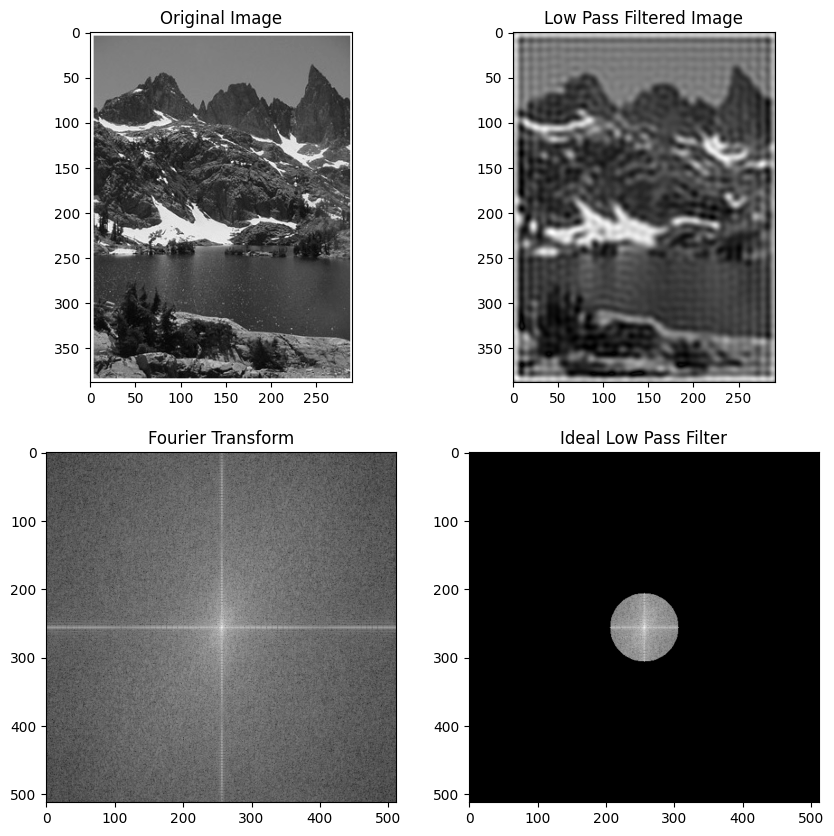

In [602]:
ideal_lpf_img, ideal_lpf_ft = ideal_lpf(img2, 50)

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(ideal_lpf_img, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.subplot(2,2,3)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(fft2(img2)))), cmap='gray')
plt.title('Fourier Transform')
plt.subplot(2,2,4)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(ideal_lpf_ft))), cmap='gray')
plt.title('Ideal Low Pass Filter')
plt.show()

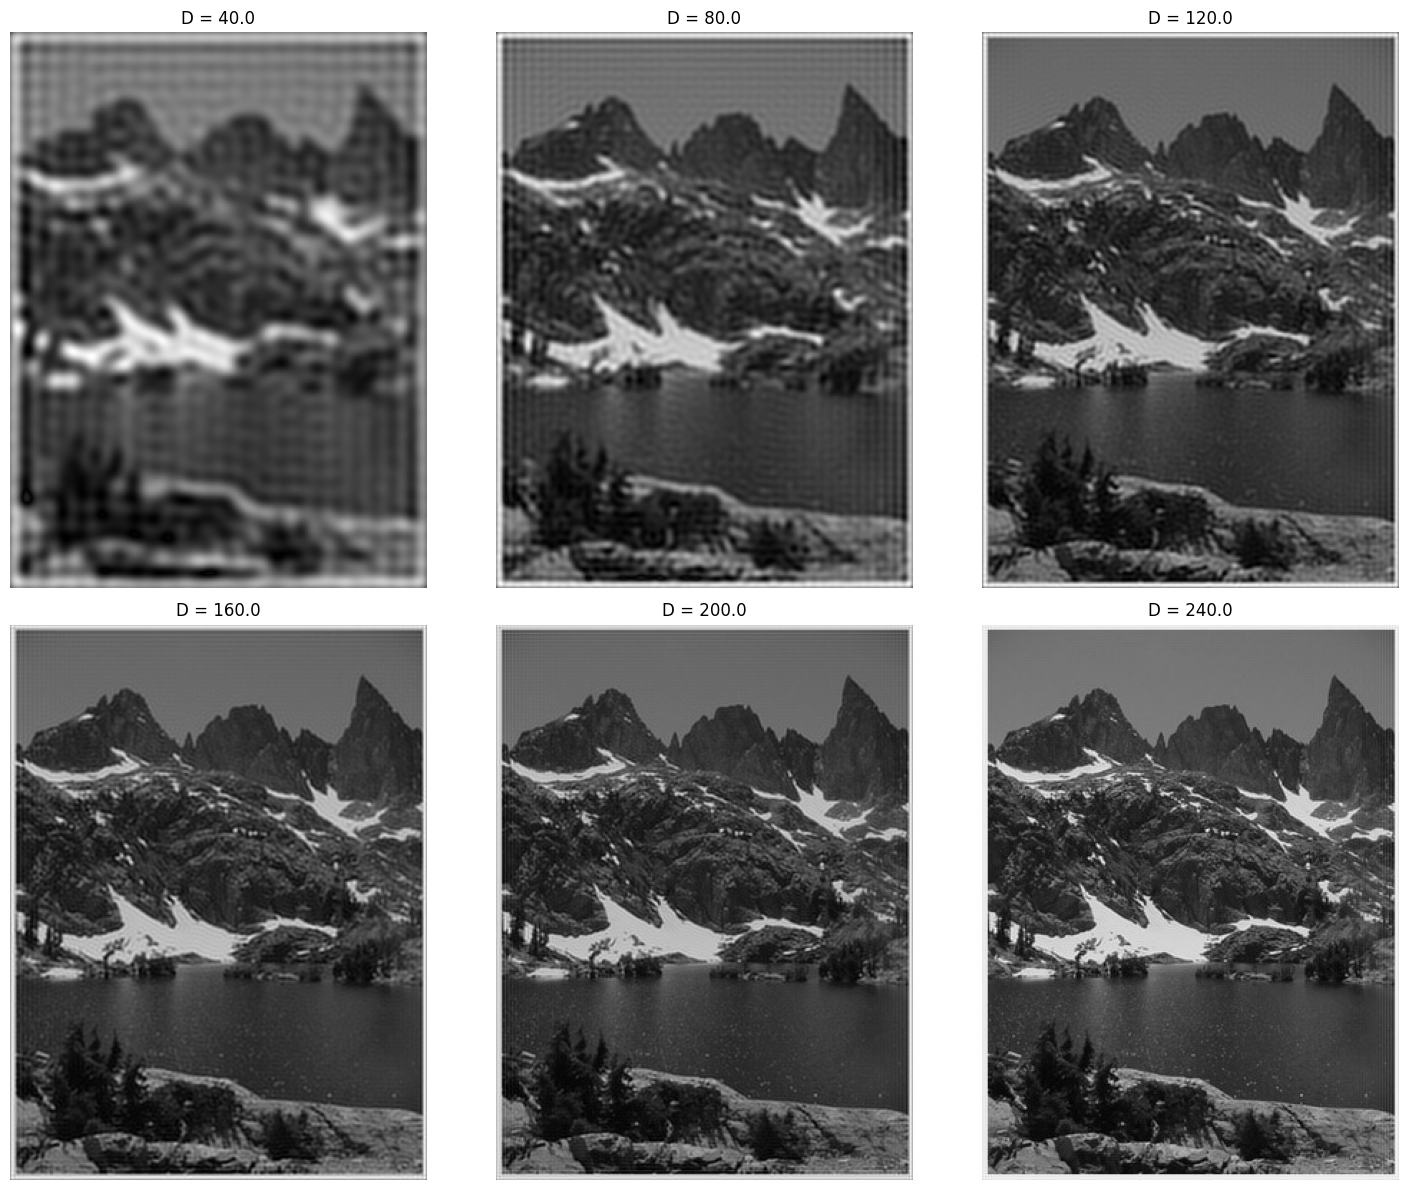

In [603]:
d = np.linspace(40, 240, 6)
plt.figure(figsize=(15, 12))

for i in d:
    plt.subplot(2,3,int(i/40))
    plt.imshow(ideal_lpf(img2, i)[0], cmap='gray')
    plt.title('D = {}'.format(i))
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Gaussian Low Pass Filter

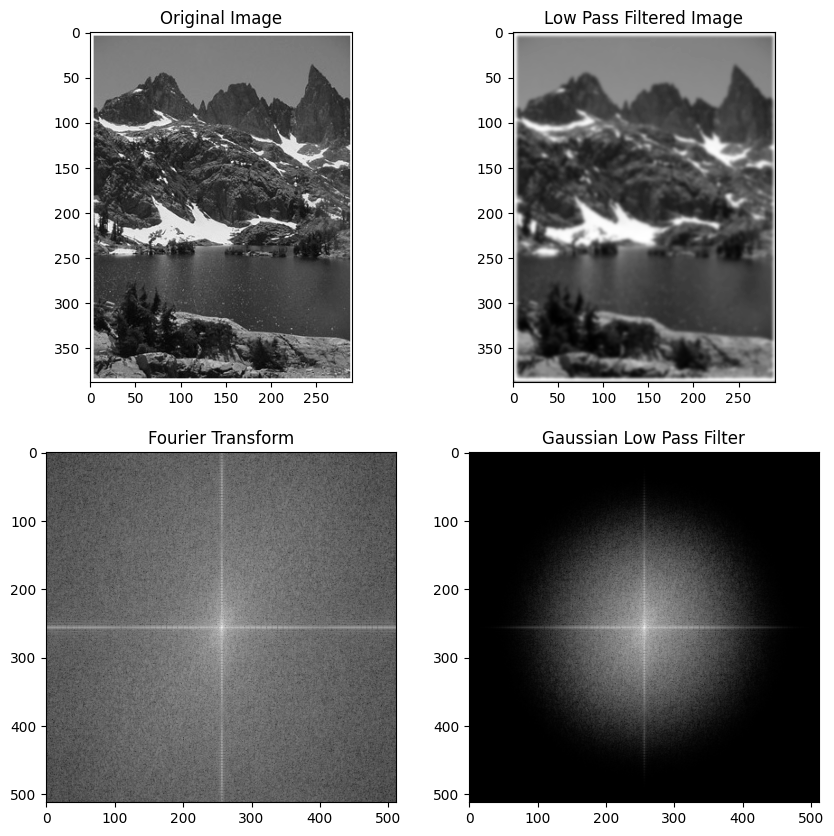

In [604]:
g_lpf_img, g_lpf_ft = gaussian_lpf(img2, 50)

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(g_lpf_img, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.subplot(2,2,3)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(fft2(img2)))), cmap='gray')
plt.title('Fourier Transform')
plt.subplot(2,2,4)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(g_lpf_ft))), cmap='gray')
plt.title('Gaussian Low Pass Filter')
plt.show()

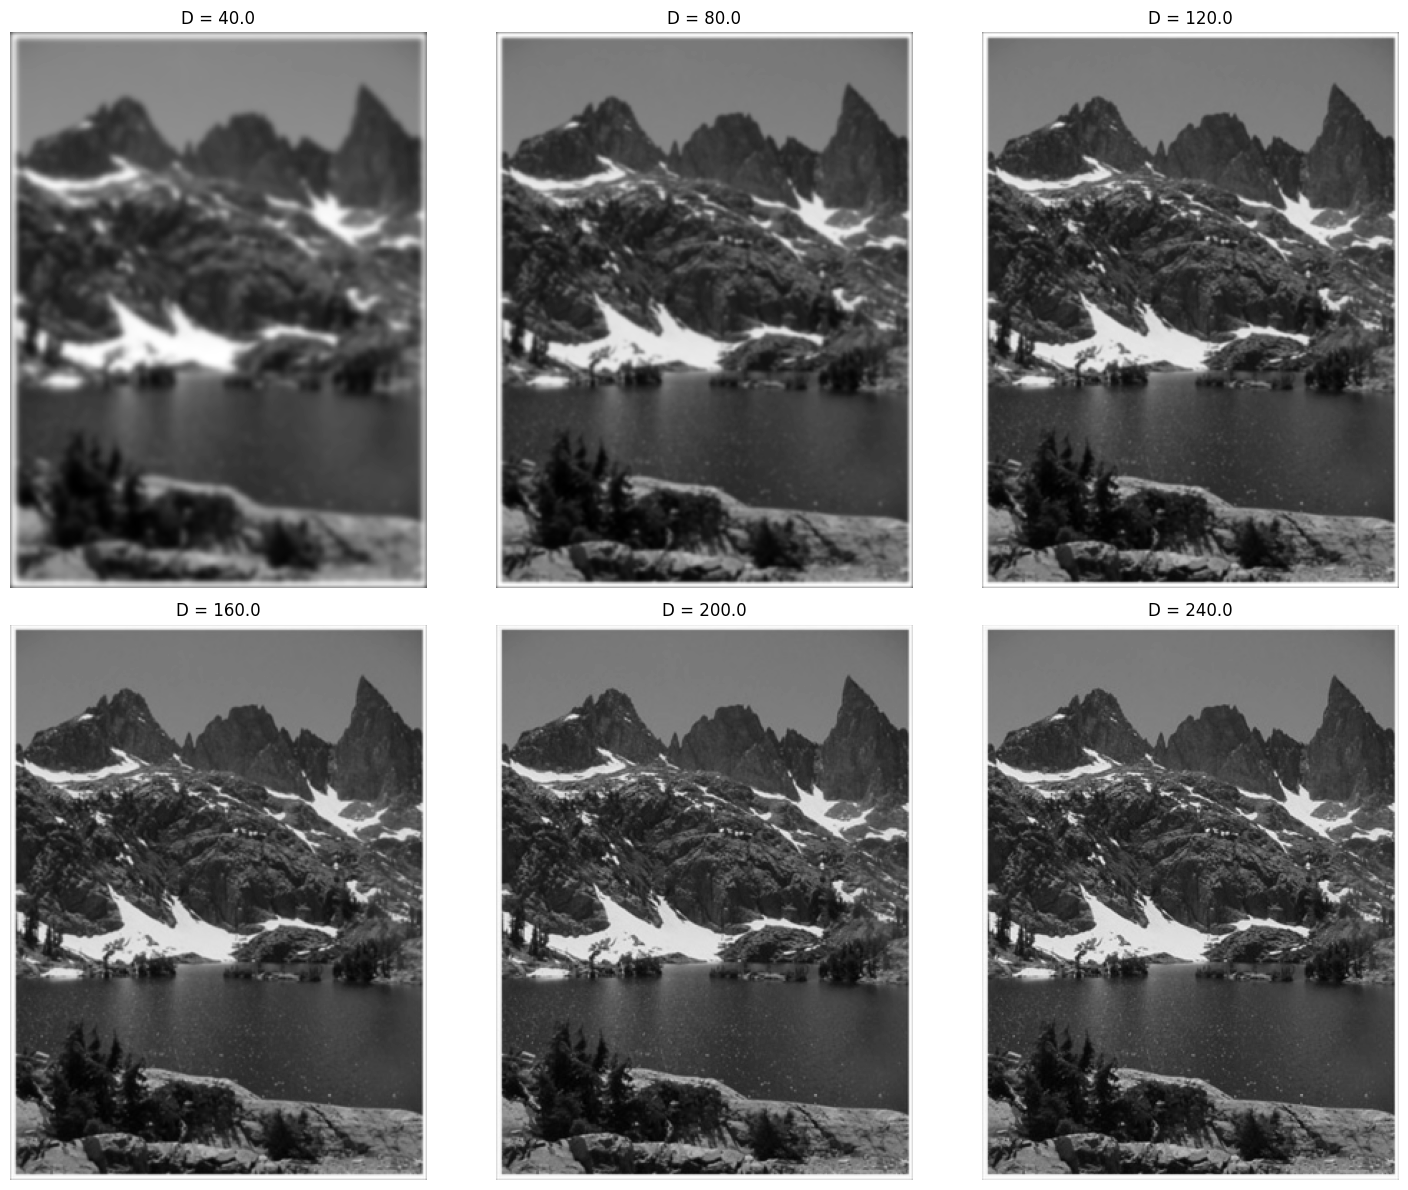

In [605]:
d = np.linspace(40, 240, 6)
plt.figure(figsize=(15, 12))

for i in d:
    plt.subplot(2,3,int(i/40))
    plt.imshow(gaussian_lpf(img2, i)[0], cmap='gray')
    plt.title('D = {}'.format(i))
    plt.axis('off')

plt.tight_layout()
plt.show()

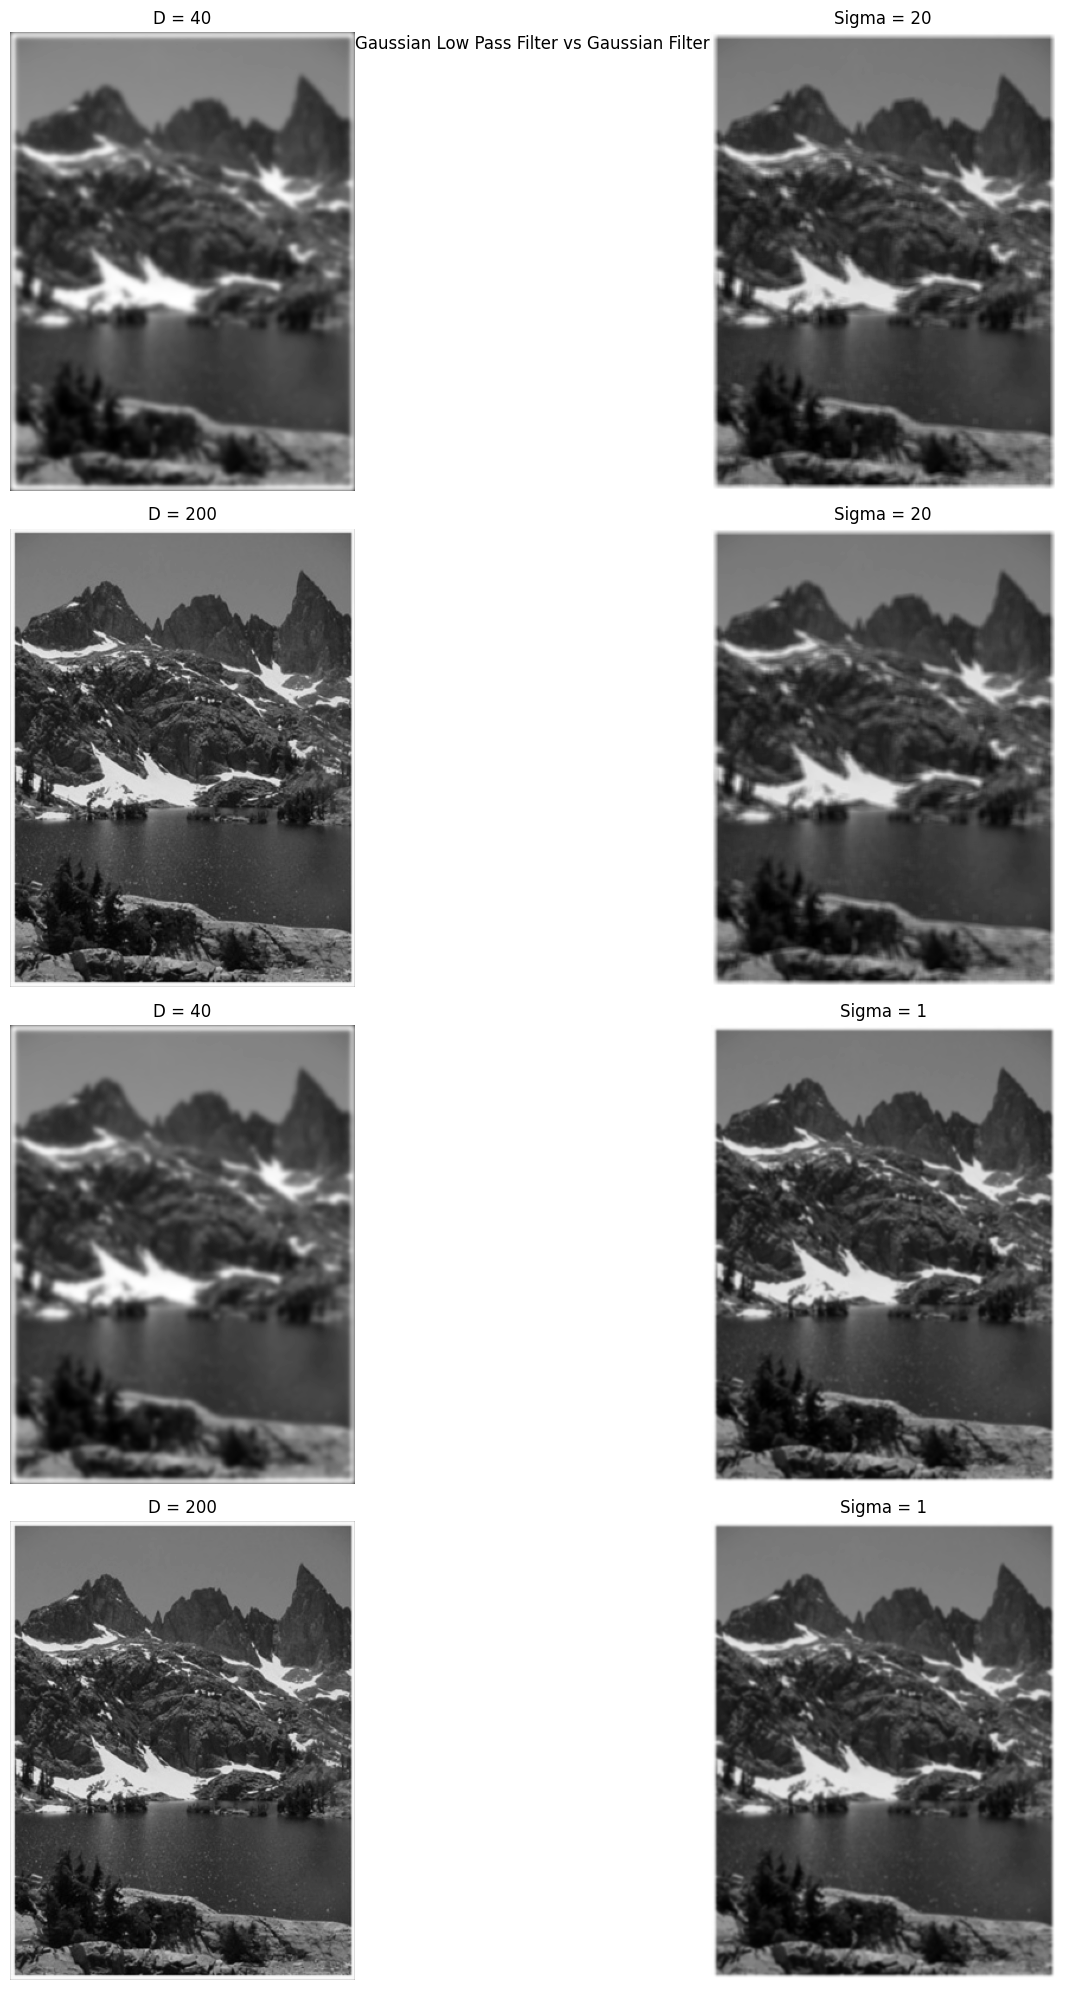

In [614]:
sigmas = [20, 1]
Ds = [40, 200]

plt.figure(figsize=(18, 20))

for i in range(len(sigmas)):
    for j in range(len(Ds)):
        plt.subplot(4,2,4*i+2*j+1)
        plt.imshow(gaussian_lpf(img2, Ds[j])[0], cmap='gray')
        plt.title('D = {}'.format(Ds[j]))
        plt.axis('off')
        plt.subplot(4,2,4*i+2*j+2)
        plt.imshow(gaussianFilter(img2, 5, sigmas[i]), cmap='gray')
        plt.title('Sigma = {}'.format(sigmas[i]))
        plt.axis('off')

plt.tight_layout()
plt.suptitle('Gaussian Low Pass Filter vs Gaussian Filter')
plt.show()

> Observations

Applying Gaussian filter is almost equivalent to getting the low pass components from the image. Higher values of sigma give more smoothening, and thus equivalent to lower values of D (for the low pass filter).

## Question 3

In [21]:
img3 = Image.open('cart.jpg').convert('L')
img3 = np.array(img3)

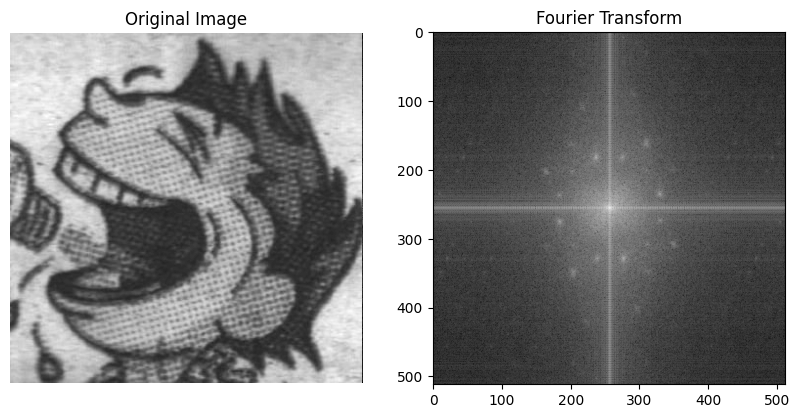

In [30]:
display_ft(img3, fft2(img3))

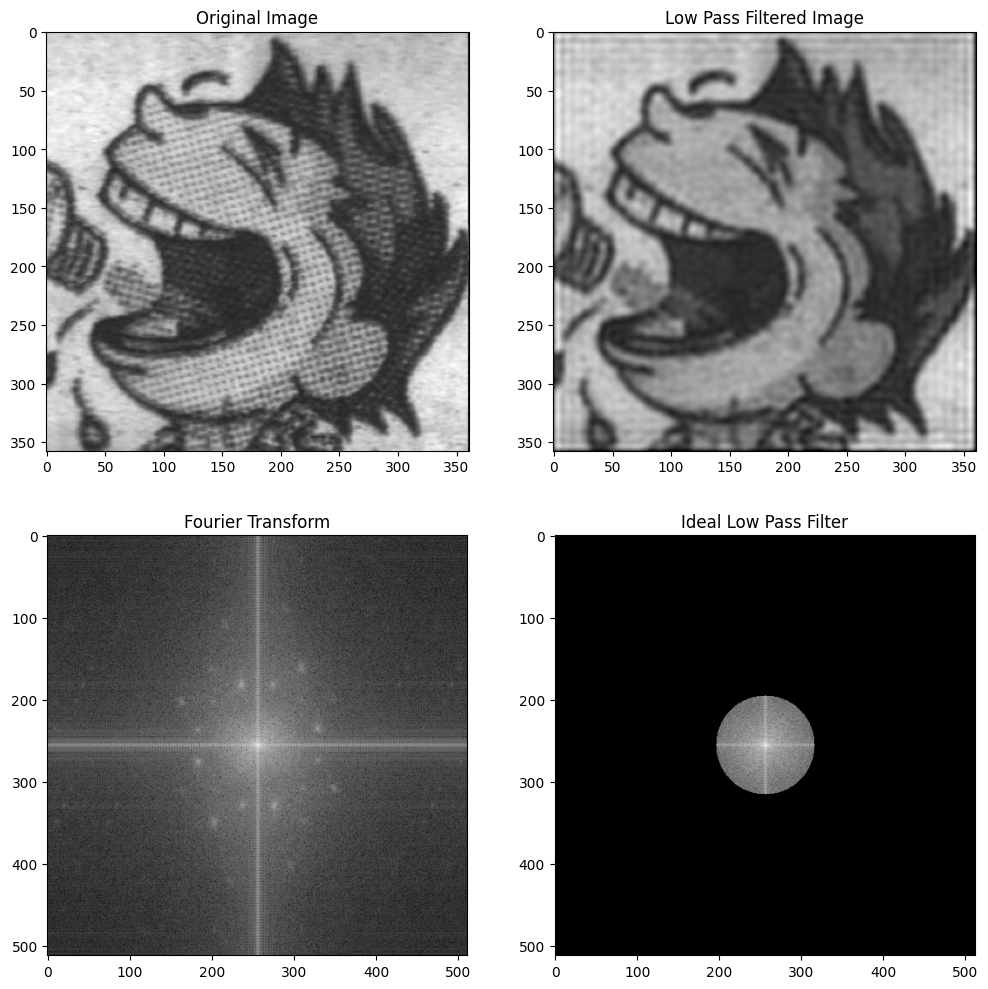

In [94]:
ideal_lpf_img, ideal_lpf_ft = ideal_lpf(img3, 60)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(ideal_lpf_img, cmap='gray')
plt.title('Low Pass Filtered Image')

plt.subplot(2,2,3)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(fft2(img3)))), cmap='gray')
plt.title('Fourier Transform')
plt.subplot(2,2,4)
plt.imshow(np.log(10 + np.abs(np.fft.fftshift(ideal_lpf_ft))), cmap='gray')
plt.title('Ideal Low Pass Filter')
# plt.tight_layout()
plt.show()

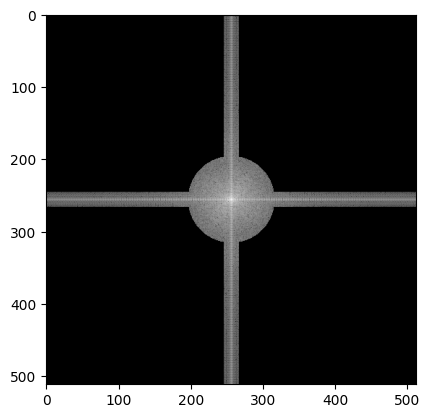

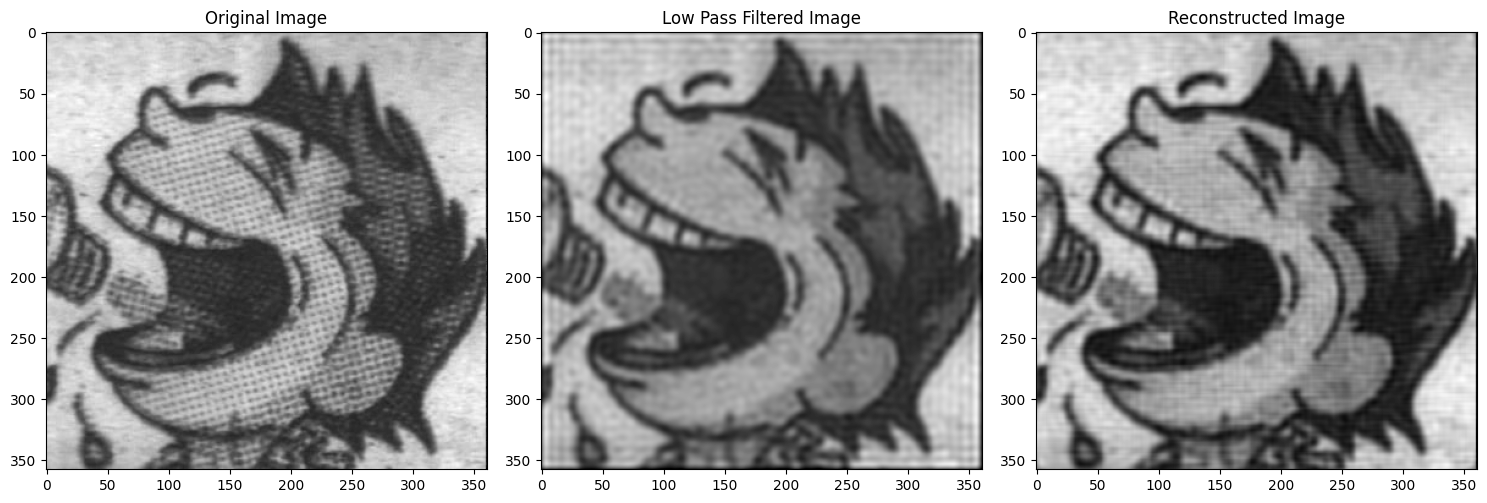

In [95]:
dist = np.sqrt(120)

ft = fft2(img3)
ft = np.fft.fftshift(ft)

x, y = np.meshgrid(np.arange(-ft.shape[1]//2, ft.shape[1]//2), np.arange(-ft.shape[0]//2, ft.shape[0]//2))

ft1 = ft.copy()
ft1[(np.abs(x) > dist) & (np.abs(y) > dist)] = 0

ft1 = np.fft.ifftshift(ft1)

mask = ft1 == 0
ft1[mask] = ideal_lpf_ft[mask]

# Get image the image back from the fourier transform
img3_1 = np.abs(ifft2(ft1, img3.shape))

plt.imshow(np.log(10 + np.abs(np.fft.fftshift(ft1))), cmap='gray')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(ideal_lpf_img, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.subplot(1,3,3)
plt.imshow(img3_1, cmap='gray')
plt.title('Reconstructed Image')
plt.tight_layout()
plt.show()
